## Import Libraries And Load Dataset



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
import tensorflow.keras.utils as ku
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
import tensorflow as tf
tf.__version__

'2.2.0-rc4'

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Prepare The Dataset



In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
y_train = ku.to_categorical(y_train, 10)
y_test = ku.to_categorical(y_test, 10)

## Building Transfer Learning Models

In [0]:
vgg = VGG19(input_shape=(32,32,3), weights='imagenet', include_top=False)

In [0]:
for layer in vgg.layers:
  layer.trainable = False

In [0]:
x = Flatten()(vgg.output)

In [0]:
x=Dense(units=1024,activation='relu')(x)
x=Dense(units=512,activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(units=256,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(units=128,activation='relu')(x)
prediction = Dense(units=10, activation='softmax')(x)

In [0]:
model = Model(inputs=vgg.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(
       horizontal_flip=False,
       zoom_range=.1 )


train_datagen.fit(x_train)

In [18]:
# fits the model on batches with real-time data augmentation:
history=model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=150),
                    steps_per_epoch=len(x_train) / 150, epochs=20,
                    validation_data=(x_test,y_test),
                    validation_steps=len(x_test)/150)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
334/333 [==============================] - 21s 61ms/step - loss: 1.5399 - accuracy: 0.4506 - val_loss: 1.3481 - val_accuracy: 0.5184
Epoch 2/20
334/333 [==============================] - 20s 59ms/step - loss: 1.3195 - accuracy: 0.5377 - val_loss: 1.2498 - val_accuracy: 0.5592
Epoch 3/20
334/333 [==============================] - 20s 60ms/step - loss: 1.2455 - accuracy: 0.5653 - val_loss: 1.2302 - val_accuracy: 0.5744
Epoch 4/20
334/333 [==============================] - 20s 60ms/step - loss: 1.1958 - accuracy: 0.5821 - val_loss: 1.2225 - val_accuracy: 0.5756
Epoch 5/20
334/333 [==============================] - 20s 60ms/step - loss: 1.1563 - accuracy: 0.5955 - val_loss: 1.2381 - val_accuracy: 0.5729
Epoch 6/20
334/333 [==============================] - 20s 59ms/step - loss: 1.1211 - accuracy: 0.6075 - val_loss: 1.1849 - val_accuracy: 0.5855
Epoch 7/20
334/333 [==============================] - 20s 60

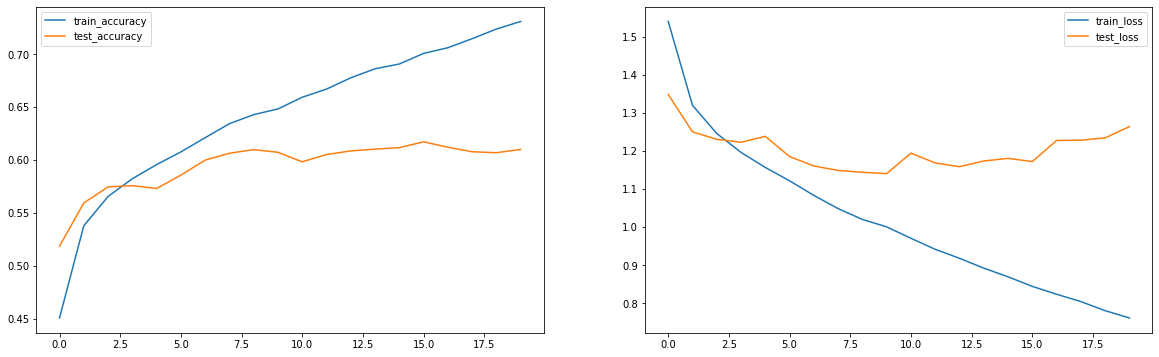

In [19]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.legend()
plt.show()